# Problem Set 2 CS129.18

The following problem set will revolve around the Pokemon stats dataset.
The dataset `data/Pokemon.csv` has **721** rows and **27** columns. Not all columns are needed for the questions to be asked.


## Requirements


>Gotta catch 'em all.

Using the lessons on Logistic Regression, and the other resource notebooks, show the following in this Jupyter Notebook.

Write your answers down as Markdown cells or comments in the code.

1. How many Legendary Pokemon are there? ( 1pt )

2. Who is the Pokemon with the highest attack-to-HP ratio? (Tip: Just get the divide attack by HP) ( 3pts )

3. Build a binary classifier for whether Pokemon are Fire Type or not. ( 4pts )

4. Describe the attributes and stats of all Legendary Type pokemon using boxplots. ( 5pts )

5. Solve for the probabilities of each Pokemon being a Fire Type. ( 2pts )

6. What is the accuracy of your model?( 2pts )

7. Apply upsampling for the minority class that is Fire Type and show the change in Accuracy and Precision. ( 3pts )



-----


Bonus 1 : What is the difference between machine learning and pattern recognition? (1pt)



Bonus 2:  Who is your favorite Pokemon?

In [158]:
%matplotlib inline

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn

import warnings

warnings.filterwarnings(action="ignore")

In [159]:
da = pd.read_csv("Pokemon1.csv")
db = pd.read_csv("Pokemon.csv")

In [160]:
da.set_index('name')
db.set_index('Name')

dfm = db.merge(da, left_index=True, right_index=True)
dfm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 721 entries, 0 to 720
Data columns (total 64 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Number             721 non-null    int64  
 1   Name               721 non-null    object 
 2   Type_1             721 non-null    object 
 3   Type_2             350 non-null    object 
 4   Total              721 non-null    int64  
 5   HP                 721 non-null    int64  
 6   Attack             721 non-null    int64  
 7   Defense            721 non-null    int64  
 8   Sp_Atk             721 non-null    int64  
 9   Sp_Def             721 non-null    int64  
 10  Speed              721 non-null    int64  
 11  Generation         721 non-null    int64  
 12  isLegendary        721 non-null    bool   
 13  Color              721 non-null    object 
 14  hasGender          721 non-null    bool   
 15  Pr_Male            644 non-null    float64
 16  Egg_Group_1        721 non

In [161]:
dfm.index

Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
            ...
            711, 712, 713, 714, 715, 716, 717, 718, 719, 720],
           dtype='int64', length=721)

In [162]:
df = dfm[dfm['generation'] < 7 ]
df = df.drop([ 
 "abilities",
 "attack",
 "base_happiness",
 "base_total",
 "capture_rate",
 "experience_growth",
 "height_m",
 "hp",
 "percentage_male",
 "pokedex_number",
    "japanese_name",
 "name",
 "sp_attack",
 "sp_defense",
 "speed",
 "type1",
 "type2",
 "weight_kg",
 "generation",
 "is_legendary"
    ],axis=1)

In [163]:
df.head()

,Number,Name,Type_1,Type_2,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,...,against_ice,against_normal,against_poison,against_psychic,against_rock,against_steel,against_water,base_egg_steps,classfication,defense
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,...,2.0,1.0,1.0,2.0,1.0,1.0,0.5,5120,Seed Pokémon,49
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,...,2.0,1.0,1.0,2.0,1.0,1.0,0.5,5120,Seed Pokémon,63
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,...,2.0,1.0,1.0,2.0,1.0,1.0,0.5,5120,Seed Pokémon,123
3,4,Charmander,Fire,NaN,309,39,52,43,60,50,...,0.5,1.0,1.0,1.0,2.0,0.5,2.0,5120,Lizard Pokémon,43
4,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,...,0.5,1.0,1.0,1.0,2.0,0.5,2.0,5120,Flame Pokémon,58


In [151]:
df.info()
df.dtypes

<class 'pandas.core.frame.DataFrame'>
Int64Index: 721 entries, 0 to 720
Data columns (total 64 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Number             721 non-null    int64  
 1   Name               721 non-null    object 
 2   Type_1             721 non-null    object 
 3   Type_2             350 non-null    object 
 4   Total              721 non-null    int64  
 5   HP                 721 non-null    int64  
 6   Attack             721 non-null    int64  
 7   Defense            721 non-null    int64  
 8   Sp_Atk             721 non-null    int64  
 9   Sp_Def             721 non-null    int64  
 10  Speed              721 non-null    int64  
 11  Generation         721 non-null    int64  
 12  isLegendary        721 non-null    bool   
 13  Color              721 non-null    object 
 14  hasGender          721 non-null    bool   
 15  Pr_Male            644 non-null    float64
 16  Egg_Group_1        721 non

Number            int64
Name             object
Type_1           object
Type_2           object
Total             int64
                 ...   
type1            object
type2            object
weight_kg       float64
generation        int64
is_legendary      int64
Length: 64, dtype: object

## PS 2.1 Number of Legendary Pokemon

I just used the same code we used in the lesson.

In [152]:
print('PS 2.1 Number of Legendary Pokemon')
len(df[df.isLegendary == True])

PS 2.1 Number of Legendary Pokemon


46

## PS 2.2 Pokemon with the highest attack-to-HP ratio

I made a column that had the computation for dividing attack by its HP to solve for its ratio

In [99]:
print('PS 2.2 Pokemon with the highest attack-to-HP ratio')

df['AttHpRatio'] = df['attack']/df['hp']
df[['name','AttHpRatio']].sort_values(by='AttHpRatio', ascending=False)

PS 2.2 Pokemon with the highest attack-to-HP ratio


,name,AttHpRatio
291,Shedinja,90.000000
49,Diglett,5.500000
97,Krabby,3.500000
718,Diancie,3.200000
50,Dugtrio,2.857143
...,...,...
359,Wynaut,0.242105
201,Wobbuffet,0.173684
439,Happiny,0.050000
241,Blissey,0.039216


## PS 2.3 Binary classifier for whether Pokemon are Fire Type or not

I tried different methods of making binary classifiers for the Types but I settled for this line of code since it was just one line.

In [100]:
print('PS 2.3 Binary classifier for whether Pokemon are Fire Type or not')
# CREATE A BOOL COLUMN FOR isFire
'''
df1 = df.Type_1.str.get_dummies()
df1.columns = ['is' + col for col in df1.columns]
df2 = df.Type_2.str.get_dummies()
df2.columns = ['is' + col for col in df2.columns]
columns = [col for col in df1.columns]
'''

df['isFire'] = (df['type1'] == 'fire') | (df['type2'] == 'fire')

'''
print(len(df[df.isFire == True]))
df['isFire']

data = df
def updateTypeColumn(dataframe, columnName, columnValue):
    for index, row in dataframe.iterrows():
        if row.Type_1 == columnValue:
            dataframe.loc[index, columnName] = 1
        else:
            dataframe.loc[index, columnName] = 0
            
updateTypeColumn(data, 'Type_1', 'isFire')
data['Type_1'] = data['Type_1'].apply(bool)
df['isFire']'''

df['isFire']

PS 2.3 Binary classifier for whether Pokemon are Fire Type or not


0      False
1      False
2      False
3       True
4       True
       ...  
716    False
717    False
718    False
719    False
720     True
Name: isFire, Length: 721, dtype: bool

## PS 2.4 Attributes and stats of all Legendary Type pokemon using boxplots

I used the code presented in one of the lecture notebooks

PS 2.4 Attributes and stats of all Legendary Type pokemon using boxplots


<AxesSubplot:>

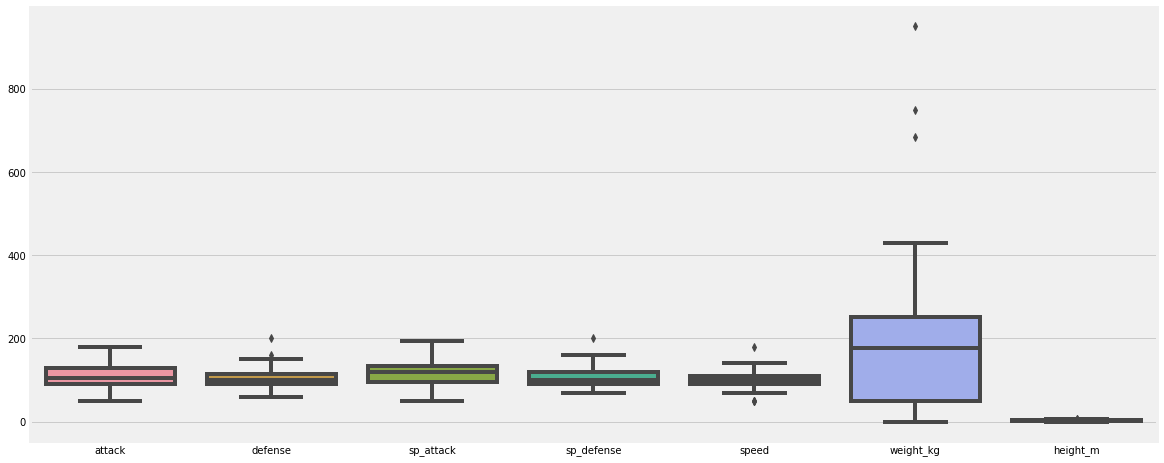

In [101]:
print('PS 2.4 Attributes and stats of all Legendary Type pokemon using boxplots')
plt.figure(figsize=(18,8))
df3 = df[(df['is_legendary'] ==True)]
df3 = df3[["attack", "defense", "sp_attack", "sp_defense", "speed", "weight_kg", "height_m"]]
sns.boxplot(data = df3)

## PS 2.5 Probability of each Pokemon being a Fire Type

1) Identified the categorical variables and turned them all into binary columns
2) Looked for the correlation of each feature
3) Settled for the following features:
    - "Sp_Atk", "body_style_quadruped", "Color_Red",'Color_Blue"
    - "body_style_with_fins"

\*however, I have not been able to justify certain features logically

### Input Additional variables

In [102]:
d = [df.dtypes]
d

[abilities             object
 against_bug          float64
 against_dark         float64
 against_dragon       float64
 against_electric     float64
 against_fairy        float64
 against_fight        float64
 against_fire         float64
 against_flying       float64
 against_ghost        float64
 against_grass        float64
 against_ground       float64
 against_ice          float64
 against_normal       float64
 against_poison       float64
 against_psychic      float64
 against_rock         float64
 against_steel        float64
 against_water        float64
 attack                 int64
 base_egg_steps         int64
 base_happiness         int64
 base_total             int64
 capture_rate           int64
 classfication         object
 defense                int64
 experience_growth      int64
 height_m             float64
 hp                     int64
 japanese_name         object
 name                  object
 percentage_male      float64
 pokedex_number         int64
 sp_attack

In [103]:
#col = pd.get_dummies(df.classfication,prefix='class')
#col2 = pd.get_dummies(df.Body_Style,prefix='body_style')
#col3 = pd.get_dummies(df.Egg_Group_1,prefix='Egg_Group')
#df = df.join(col)
#df = df.join(col2)
#df = df.join(col3

df.columns


Index(['abilities', 'against_bug', 'against_dark', 'against_dragon',
       'against_electric', 'against_fairy', 'against_fight', 'against_fire',
       'against_flying', 'against_ghost', 'against_grass', 'against_ground',
       'against_ice', 'against_normal', 'against_poison', 'against_psychic',
       'against_rock', 'against_steel', 'against_water', 'attack',
       'base_egg_steps', 'base_happiness', 'base_total', 'capture_rate',
       'classfication', 'defense', 'experience_growth', 'height_m', 'hp',
       'japanese_name', 'name', 'percentage_male', 'pokedex_number',
       'sp_attack', 'sp_defense', 'speed', 'type1', 'type2', 'weight_kg',
       'generation', 'is_legendary', 'AttHpRatio', 'isFire'],
      dtype='object')

In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 721 entries, 0 to 720
Data columns (total 43 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   abilities          721 non-null    object 
 1   against_bug        721 non-null    float64
 2   against_dark       721 non-null    float64
 3   against_dragon     721 non-null    float64
 4   against_electric   721 non-null    float64
 5   against_fairy      721 non-null    float64
 6   against_fight      721 non-null    float64
 7   against_fire       721 non-null    float64
 8   against_flying     721 non-null    float64
 9   against_ghost      721 non-null    float64
 10  against_grass      721 non-null    float64
 11  against_ground     721 non-null    float64
 12  against_ice        721 non-null    float64
 13  against_normal     721 non-null    float64
 14  against_poison     721 non-null    float64
 15  against_psychic    721 non-null    float64
 16  against_rock       721 non

<AxesSubplot:>

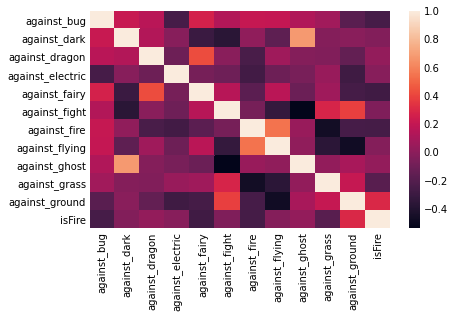

In [105]:
# plt.subplots(figsize = (18,5))
sns.heatmap(df[[
    "against_bug",
    "against_dark",
    "against_dragon",
    "against_electric",
    "against_fairy",
    "against_fight",
    "against_fire",
    "against_flying",
    "against_ghost",
    "against_grass",
    "against_ground",
    "isFire"]].corr(method='pearson'))

In [106]:
df[[
    "against_bug", #1 
    "against_dark",
    "against_dragon",
    "against_electric",
    "against_fairy", #2
    "against_fight",
    "against_fire",
    "against_flying",
    "against_ghost",
    "against_grass",
    "against_ground", #3
    "isFire"]].corr(method='pearson')

,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,against_grass,against_ground,isFire
against_bug,1.000000,0.217044,0.160484,-0.251820,0.271327,0.139012,0.207005,0.202130,0.130979,0.078002,-0.182247,-0.255751
against_dark,0.217044,1.000000,0.136887,-0.011468,-0.304678,-0.369778,0.017006,-0.165466,0.675781,-0.023862,-0.009377,-0.029359
against_dragon,0.160484,0.136887,1.000000,-0.110755,0.428420,-0.004854,-0.245015,0.072561,-0.028709,-0.037228,-0.147675,0.028261
against_electric,-0.251820,-0.011468,-0.110755,1.000000,-0.071083,-0.106269,-0.271191,-0.111824,-0.065090,0.044786,-0.283269,-0.014530
against_fairy,0.271327,-0.304678,0.428420,-0.071083,1.000000,0.155909,-0.174828,0.163989,-0.117676,0.069163,-0.260434,-0.280827
against_fight,0.139012,-0.369778,-0.004854,-0.106269,0.155909,1.000000,-0.074409,-0.325644,-0.540204,0.281529,0.380610,-0.043746
against_fire,0.207005,0.017006,-0.245015,-0.271191,-0.174828,-0.074409,1.000000,0.545305,0.044562,-0.465761,-0.255464,-0.257581
against_flying,0.202130,-0.165466,0.072561,-0.111824,0.163989,-0.325644,0.545305,1.000000,0.017320,-0.365177,-0.468556,-0.026913
against_ghost,0.130979,0.675781,-0.028709,-0.065090,-0.117676,-0.540204,0.044562,0.017320,1.000000,0.020778,0.099940,0.028384
against_grass,0.078002,-0.023862,-0.037228,0.044786,0.069163,0.281529,-0.465761,-0.365177,0.020778,1.000000,0.211319,-0.191116


<AxesSubplot:>

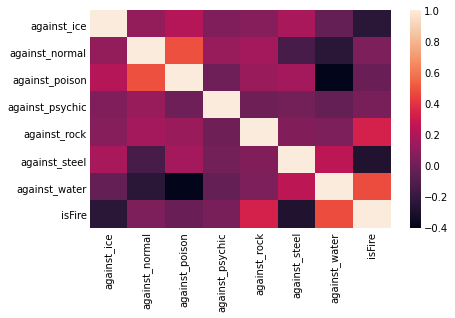

In [107]:
sns.heatmap(df[[
"against_ice",
"against_normal",
"against_poison",
"against_psychic",
"against_rock",
"against_steel",
"against_water",
    'isFire'
]].corr(method='pearson'))

In [108]:
df[[
"against_ice", #7
"against_normal",
"against_poison",
"against_psychic",
"against_rock", #5
"against_steel", #6
"against_water", #4
    'isFire'
]].corr(method='pearson')

,against_ice,against_normal,against_poison,against_psychic,against_rock,against_steel,against_water,isFire
against_ice,1.000000,0.116679,0.217519,0.051619,0.073549,0.180312,-0.036309,-0.246390
against_normal,0.116679,1.000000,0.490454,0.131483,0.163624,-0.135848,-0.246223,0.045488
against_poison,0.217519,0.490454,1.000000,-0.005794,0.138239,0.172206,-0.401766,-0.020890
against_psychic,0.051619,0.131483,-0.005794,1.000000,-0.010393,0.008938,-0.037150,0.027176
against_rock,0.073549,0.163624,0.138239,-0.010393,1.000000,0.055744,0.044712,0.335130
against_steel,0.180312,-0.135848,0.172206,0.008938,0.055744,1.000000,0.251134,-0.276689
against_water,-0.036309,-0.246223,-0.401766,-0.037150,0.044712,0.251134,1.000000,0.478499
isFire,-0.246390,0.045488,-0.020890,0.027176,0.335130,-0.276689,0.478499,1.000000


<AxesSubplot:>

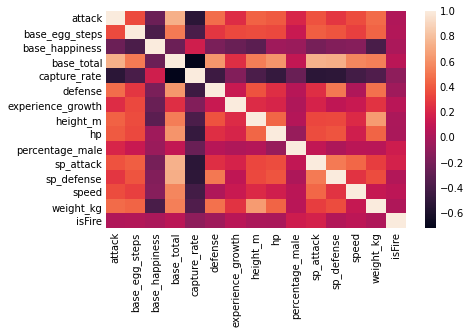

In [109]:
sns.heatmap(
df[[
"attack",
"base_egg_steps",
"base_happiness",
"base_total",
"capture_rate",
"defense",
"experience_growth",
"height_m",
"hp",
"percentage_male",
"sp_attack", #8
"sp_defense",
"speed",
"weight_kg",
    'isFire'
]].corr(method='pearson'))

In [110]:
df[[
"attack",
"base_egg_steps",
"base_happiness",
"base_total",
"capture_rate",
"defense",
"experience_growth",
"height_m",
"hp",
"percentage_male",
"sp_attack",
"sp_defense",
"speed",
"weight_kg",
    'isFire'
]].corr(method='pearson')

,attack,base_egg_steps,base_happiness,base_total,capture_rate,defense,experience_growth,height_m,hp,percentage_male,sp_attack,sp_defense,speed,weight_kg,isFire
attack,1.000000,0.352655,-0.249907,0.731881,-0.526603,0.468690,0.239101,0.428896,0.401039,0.202746,0.378165,0.279342,0.358851,0.464488,0.024048
base_egg_steps,0.352655,1.000000,-0.381647,0.519844,-0.387206,0.278457,0.341045,0.357485,0.345254,0.129677,0.419951,0.384803,0.307531,0.440816,0.037240
base_happiness,-0.249907,-0.381647,1.000000,-0.248735,0.158732,-0.187959,-0.252703,-0.312986,-0.042143,-0.060914,-0.204328,-0.151700,-0.138369,-0.392866,0.005814
base_total,0.731881,0.519844,-0.248735,1.000000,-0.723402,0.626390,0.242989,0.534846,0.617114,0.103786,0.742750,0.727730,0.562796,0.538211,0.069756
capture_rate,-0.526603,-0.387206,0.158732,-0.723402,1.000000,-0.441878,-0.157033,-0.382822,-0.479104,-0.255023,-0.525579,-0.517294,-0.414265,-0.364627,-0.105334
defense,0.468690,0.278457,-0.187959,0.626390,-0.441878,1.000000,0.126593,0.374160,0.243418,0.055980,0.240444,0.509580,0.022493,0.483909,-0.039175
experience_growth,0.239101,0.341045,-0.252703,0.242989,-0.157033,0.126593,1.000000,0.230176,0.196986,0.017957,0.190804,0.086585,0.128212,0.261766,0.059473
height_m,0.428896,0.357485,-0.312986,0.534846,-0.382822,0.374160,0.230176,1.000000,0.447312,0.038239,0.337141,0.344731,0.224780,0.646746,0.005141
hp,0.401039,0.345254,-0.042143,0.617114,-0.479104,0.243418,0.196986,0.447312,1.000000,-0.072011,0.358457,0.385799,0.162828,0.440105,0.000696
percentage_male,0.202746,0.129677,-0.060914,0.103786,-0.255023,0.055980,0.017957,0.038239,-0.072011,1.000000,0.097669,0.012540,0.067599,0.060722,0.148777


<AxesSubplot:>

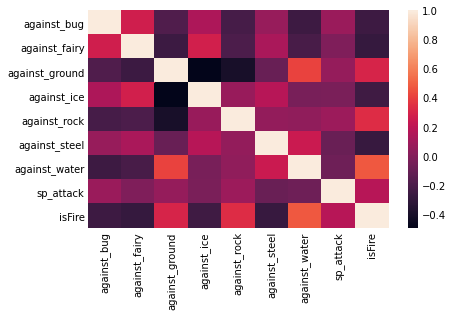

In [111]:
sns.heatmap(df[[
    "against_bug", #1 
    "against_fairy", #2
    "against_ground", #3
    "against_ice", #7
    "against_rock", #5
    "against_steel", #6
    "against_water", #4
    "sp_attack", #8
    'isFire'
    ]].corr(method='pearson'))

<Figure size 720x576 with 0 Axes>

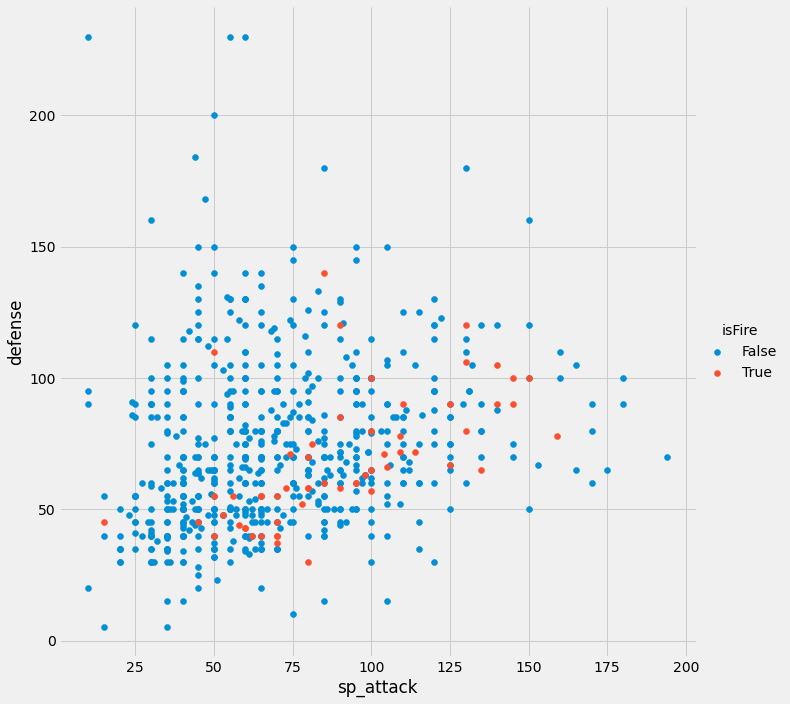

In [112]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(10,8))

sns.FacetGrid(df, hue="isFire", size = 10).map(plt.scatter, "sp_attack", "defense").add_legend()

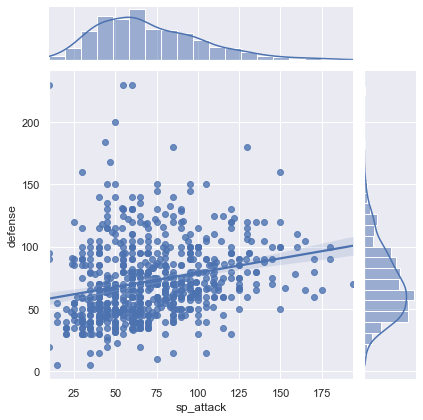

In [114]:
import seaborn as sns

sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.jointplot("sp_attack", "defense", data=df, kind='reg')

In [116]:
#sns.catplot(x="Type_1", y="Defense", kind="swarm", data=df)

In [117]:
print('PS 2.5 Probability of each Pokemon being a Fire Type')
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
X = df[["against_bug", #1 
    "against_fairy", #2
    "against_ground", #3
    "against_ice", #7
    "against_rock", #5
    "against_steel", #6
    "against_water", #4
    "sp_attack", #8
    ]]

logistic_model = LogisticRegression(class_weight="balanced")
logistic_model.fit(X, df["isFire"])
predictions = logistic_model.predict(X)
accuracy = metrics.accuracy_score(predictions,df["isFire"])
print(accuracy)

PS 2.5 Probability of each Pokemon being a Fire Type
0.984743411927878


In [118]:
df[["against_bug", #1 
    "against_fairy", #2
    "against_ground", #3
    "against_ice", #7
    "against_rock", #5
    "against_steel", #6
    "against_water", #4
    "sp_attack", #8
    'isFire'
   ]].corr(method='pearson')

,against_bug,against_fairy,against_ground,against_ice,against_rock,against_steel,against_water,sp_attack,isFire
against_bug,1.000000,0.271327,-0.182247,0.142982,-0.215741,0.066528,-0.250194,0.077310,-0.255751
against_fairy,0.271327,1.000000,-0.260434,0.277616,-0.194196,0.130702,-0.212589,-0.012451,-0.280827
against_ground,-0.182247,-0.260434,1.000000,-0.495421,-0.399511,-0.096492,0.411852,0.064464,0.300970
against_ice,0.142982,0.277616,-0.495421,1.000000,0.073549,0.180312,-0.036309,-0.029896,-0.246390
against_rock,-0.215741,-0.194196,-0.399511,0.073549,1.000000,0.055744,0.044712,0.084957,0.335130
against_steel,0.066528,0.130702,-0.096492,0.180312,0.055744,1.000000,0.251134,-0.087946,-0.276689
against_water,-0.250194,-0.212589,0.411852,-0.036309,0.044712,0.251134,1.000000,-0.072218,0.478499
sp_attack,0.077310,-0.012451,0.064464,-0.029896,0.084957,-0.087946,-0.072218,1.000000,0.179667
isFire,-0.255751,-0.280827,0.300970,-0.246390,0.335130,-0.276689,0.478499,0.179667,1.000000


In [119]:
logistic_model.coef_

array([[-1.01210676, -0.37253466,  0.01875736, -1.25303857,  1.32697271,
        -3.83444627,  3.63942012,  0.01933034]])

In [121]:
df["pred"] = predictions
prob =[x[1] for x in logistic_model.predict_proba(X)]

df["prob"] = prob
selection = df[["name","isFire","pred", "prob"]]
selection[selection["isFire"] == True].sample(20)

,name,isFire,pred,prob
391,Infernape,True,True,0.956264
606,Litwick,True,True,0.979046
249,Ho-Oh,True,True,0.998776
512,Pansear,True,True,0.966406
661,Fletchinder,True,True,0.996530
466,Magmortar,True,True,0.991431
218,Magcargo,True,True,0.999923
322,Camerupt,True,True,0.999971
77,Rapidash,True,True,0.979790
156,Typhlosion,True,True,0.988362


In [122]:
pd.DataFrame(list(zip(X.columns, logistic_model.coef_)))

,0,1
0,against_bug,"[-1.0121067554854308, -0.37253466268741037, 0...."


In [125]:
logistic_model = LogisticRegression(class_weight="balanced")

from sklearn.model_selection import  train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(df[["against_bug", #1 
                                                        "against_fairy", #2
                                                        "against_ground", #3
                                                        "against_ice", #7
                                                        "against_rock", #5
                                                        "against_steel", #6
                                                        "against_water", #4
                                                        "sp_attack", #8
                                                        ]], 
                                                    df[['isFire']], train_size = 0.55)


logistic_model.fit(X_train, Y_train)
pred_train = logistic_model.predict(X_train)
pred_test =  logistic_model.predict(X_test)
train_accuracy = metrics.accuracy_score(pred_train,Y_train)
test_accuracy = metrics.accuracy_score(pred_test,Y_test)

In [126]:
train_accuracy

0.9924242424242424

In [127]:
test_accuracy

0.9907692307692307

In [128]:
print('PS 2.7 Accuracy of the Model')
accuracy

PS 2.7 Accuracy of the Model


0.984743411927878

In [129]:
print("Accuracy:",metrics.accuracy_score(Y_test, pred_test))
print("Precision:",metrics.precision_score(Y_test, pred_test))
print("Recall:",metrics.recall_score(Y_test, pred_test))

Accuracy: 0.9907692307692307
Precision: 0.92
Recall: 0.9583333333333334


In [130]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(Y_train, pred_train)
cnf_matrix

array([[360,   3],
       [  0,  33]], dtype=int64)

Text(0.5, 527.9871999999999, 'Predicted label')

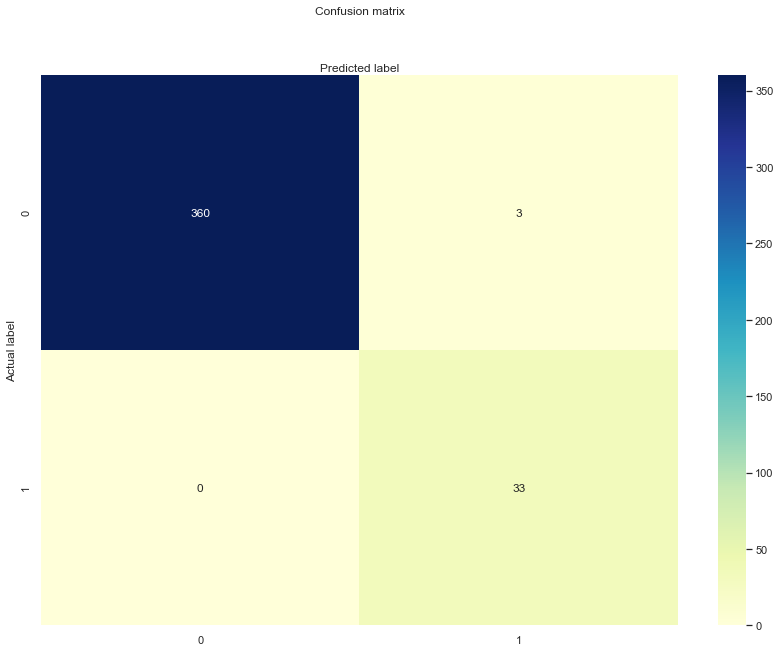

In [131]:
class_names=["0","1"] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [359]:
X.head()

,Sp_Atk,body_style_quadruped,Color_Red,Color_Blue,body_style_with_fins,Egg_Group_Field
0,65,1,0,0,0,0
1,80,1,0,0,0,0
2,100,1,0,0,0,0
3,60,0,1,0,0,0
4,80,0,1,0,0,0


#### PS 2.8 Upsampling for the minority class that is Fire Type
show the change in Accuracy and Precision

In [360]:
df = pd.read_csv("Pokemon.csv")
df['isFire'] = (df['Type_1'] == 'Fire') | (df['Type_2'] == 'Fire')

col = pd.get_dummies(df.Color,prefix='Color')
col2 = pd.get_dummies(df.Body_Style,prefix='body_style')
df = df.join(col)
df = df.join(col2)

df = df.drop([ 
    
    'Color_Green', 
    'Color_Grey', 
    'Color_Pink', 
    'Color_Purple', 
    'Color_White', 
    'body_style_bipedal_tailed',        
    'body_style_bipedal_tailless',     
    'body_style_four_wings',      
    'body_style_head_arms',        
    'body_style_head_base',             
    'body_style_head_only',        
    'body_style_insectoid',        
    'body_style_multiple_bodies',
    'body_style_serpentine_body',  
    'body_style_several_limbs',    
    'body_style_two_wings',        
],axis=1)

In [361]:
from sklearn.model_selection import train_test_split
from sklearn.utils import resample

df = df.reset_index()
X = df[["Sp_Atk",
        "body_style_quadruped",
        "Color_Red",
        "body_style_with_fins"]]


X_train, X_test, Y_train, Y_test = train_test_split(X, 
                   df["isFire"], 
                   test_size=0.3,  
                   train_size=0.7,    
                   random_state=42)

logistic_model = LogisticRegression(class_weight="balanced")
logistic_model.fit(X_train, Y_train)
pred_train = logistic_model.predict(X_train)
pred_test =  logistic_model.predict(X_test)
train_accuracy = metrics.accuracy_score(pred_train,Y_train)
test_accuracy = metrics.accuracy_score(pred_test,Y_test)

In [362]:
print("Accuracy:",metrics.accuracy_score(Y_test, pred_test))
print("Precision:",metrics.precision_score(Y_test, pred_test)) # Specificity
print("Recall:",metrics.recall_score(Y_test, pred_test)) # Sensitivity

Accuracy: 0.8387096774193549
Precision: 0.25
Recall: 0.8461538461538461


In [363]:
X = df[["Sp_Atk",
        "body_style_quadruped",
        "Color_Red",
        'Color_Blue',
        "body_style_with_fins"]]

X_train, X_test, Y_train, Y_test = train_test_split(X, 
                   df["isFire"], 
                   test_size=0.3,  
                   train_size=0.7,    
                   random_state=42)

X = pd.concat([X_train, Y_train], axis=1)


not_legendary = X[X.isFire==False]
legendary = X[X.isFire==True]
legendary_upsampled = resample(legendary,
                          replace=True, # sample with replacement
                          n_samples=len(not_legendary), # match number in majority class
                          random_state=42) # reproducible results

# combine majority and upsampled minority
legendary_upsampled = pd.concat([not_legendary, legendary_upsampled])

# check new class counts
legendary_upsampled.isFire.value_counts()

False    461
True     461
Name: isFire, dtype: int64

In [364]:
Y_train = legendary_upsampled.isFire
X_train = legendary_upsampled.drop('isFire', axis=1)

legendary_upsampled = LogisticRegression(class_weight="balanced", solver="liblinear").fit(X_train, Y_train)

upsampled_pred = legendary_upsampled.predict(X_test)

In [365]:
print("Accuracy:",metrics.accuracy_score(Y_test, upsampled_pred))
print("Precision:",metrics.precision_score(Y_test, upsampled_pred))
print("Recall:",metrics.recall_score(Y_test, upsampled_pred))

Accuracy: 0.847926267281106
Precision: 0.2619047619047619
Recall: 0.8461538461538461


Text(0.5, 527.9871999999999, 'Predicted label')

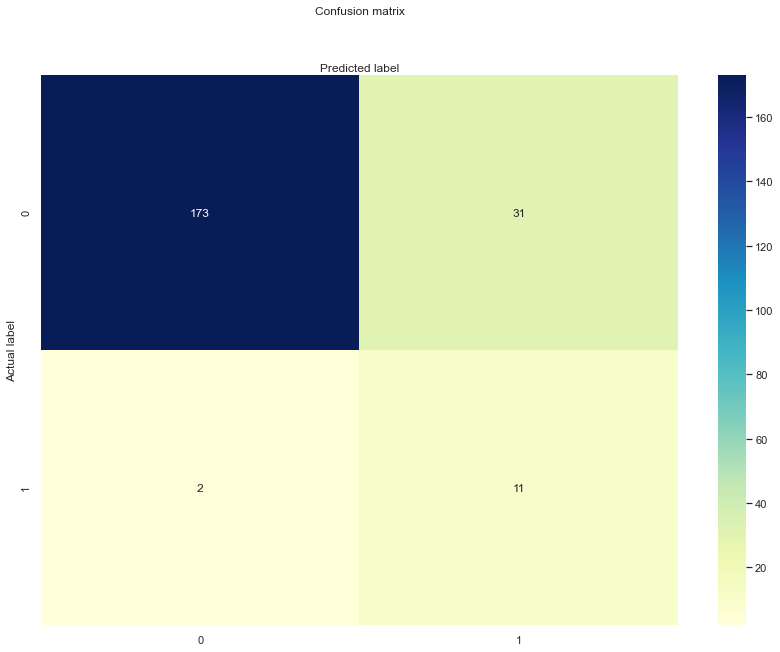

In [366]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(Y_test, upsampled_pred)
cnf_matrix

class_names=["0","1"] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')